In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report as report
from sklearn.metrics import confusion_matrix as matrix
from sklearn.tree import plot_tree
import os
import seaborn as sns

In [8]:
os.getcwd()

'C:\\Users\\Dhananjay\\3D Objects\\imarticus PGDA\\Machine learning\\Supervised Learning\\RANDOM FOREST\\Taxi Fare Prediction'

In [9]:
raw_data=pd.read_csv('TaxiFare.csv')
df= raw_data.copy(deep=True)
df


,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


Import Packages
Read Data
Data Preprocessing
3.1 - Data Types and Dimensions
3.2 - Checking for Missing Values
3.3 - Data Correction
3.4 - Statistical Summary
EDA
4.1 - Univariate Analysis
4.2 - Multivariate Analysis
4.3 - Covariance
4.4 - Correlation
Label Encoding of Categorical Data
Standardise Data
Random forest
best Grid
Model Comparision

Scope:
● Prepare and analyse data 
● Perform feature engineering wherever applicable
● Check the distribution of key numerical variables
● Training a Random Forest model with data and check it’s performance
● Perform hyperparameter tuning

In [11]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [12]:
df.drop('unique_id',axis =1,inplace =True)

In [13]:
df

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [14]:
import string as str

In [15]:
df['date_time_of_pickup']=df['date_time_of_pickup'].astype('datetime64')

In [16]:
df['day pick']=df['date_time_of_pickup'].dt.day
df['month_pick']=df['date_time_of_pickup'].dt.month
df['year pick']=df['date_time_of_pickup'].dt.year
df['hour pick']=df['date_time_of_pickup'].dt.hour
df['minute pick']=df['date_time_of_pickup'].dt.minute
df['second pick']=df['date_time_of_pickup'].dt.second

In [17]:
df

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day pick,month_pick,year pick,hour pick,minute pick,second pick
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17,26,21
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,52,16
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0,35,0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,30,42
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15,-73.999973,40.748531,-74.016899,40.705993,1,12,6,2013,23,25,15
49996,7.5,2015-06-22 17:19:18,-73.984756,40.768211,-73.987366,40.760597,1,22,6,2015,17,19,18
49997,6.9,2011-01-30 04:53:00,-74.002698,40.739428,-73.998108,40.759483,1,30,1,2011,4,53,0
49998,4.5,2012-11-06 07:09:00,-73.946062,40.777567,-73.953450,40.779687,2,6,11,2012,7,9,0


In [18]:
df=df.drop('date_time_of_pickup',axis =1)

In [19]:
# CHecking the independence of independent variables  or multicollinearity of independent variaables by VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# creating VIF dataframe
X= df.drop('amount',axis=1)

df_vif=pd.DataFrame()
df_vif['Features']=X.columns
df_vif['VIF']=[VIF(X.values,i) for i in range(len(X.columns))]
df_vif

,Features,VIF
0,longitude_of_pickup,1065.402686
1,latitude_of_pickup,548.739595
2,longitude_of_dropoff,1984.935746
3,latitude_of_dropoff,1628.467135
4,no_of_passenger,2.796897
5,day pick,4.277470
6,month_pick,4.297102
7,year pick,69.504635
8,hour pick,5.298988
9,minute pick,3.938943


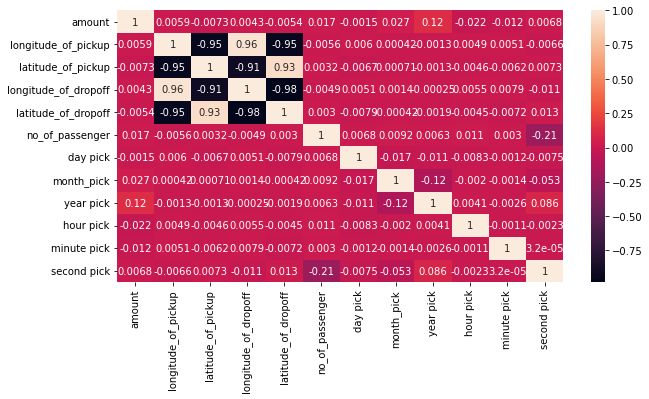

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot =True)
plt.show()

In [21]:
# locating and treating outliers 
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
iqr=Q3-Q1
L=Q1-1.5*iqr
H=Q3+1.5*iqr
df_out=df[~((df < L) | (df>H)).any(axis=1)]
df_out


,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day pick,month_pick,year pick,hour pick,minute pick,second pick
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,52,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0,35,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,30,42
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,51,0
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,6,1,2011,9,50,45
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,12,6,2013,23,25,15
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,22,6,2015,17,19,18
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,30,1,2011,4,53,0
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2,6,11,2012,7,9,0


In [22]:
# STATITICAL Summary
df_out.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day pick,month_pick,year pick,hour pick,minute pick,second pick
count,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000
mean,8.713241,-73.981858,40.752491,-73.980519,40.753024,1.258950,15.643974,6.249583,2011.703929,13.609710,29.693346,17.256939
std,3.932530,0.016129,0.021663,0.017174,0.023024,0.546573,8.656583,3.468615,1.864013,6.370325,17.316724,19.652578
min,-2.500000,-74.029201,40.686204,-74.029008,40.683703,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000,0.000000
25%,5.700000,-73.992827,40.737864,-73.991959,40.738207,1.000000,8.000000,3.000000,2010.000000,9.000000,15.000000,0.000000
50%,7.700000,-73.982828,40.753302,-73.981815,40.754325,1.000000,16.000000,6.000000,2012.000000,14.000000,30.000000,8.000000
75%,10.900000,-73.971532,40.766738,-73.970126,40.767694,1.000000,23.000000,9.000000,2013.000000,19.000000,45.000000,34.000000
max,22.100000,-73.929810,40.816026,-73.922337,40.818698,3.000000,31.000000,12.000000,2015.000000,23.000000,59.000000,59.000000


<AxesSubplot:>

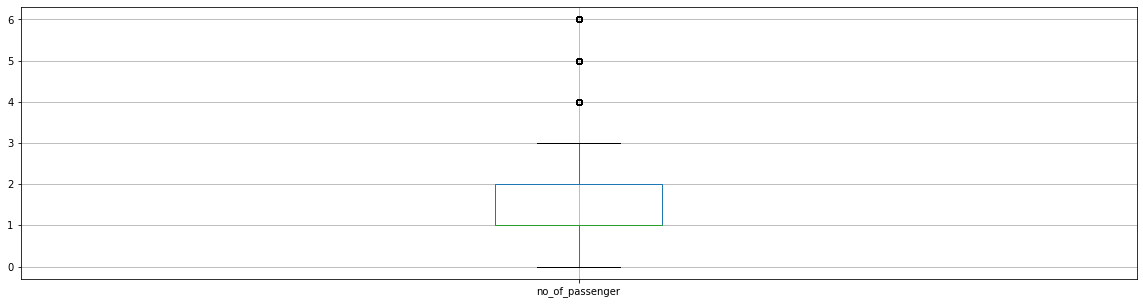

In [23]:
plt.figure(figsize=(20,5))

df.boxplot('no_of_passenger')

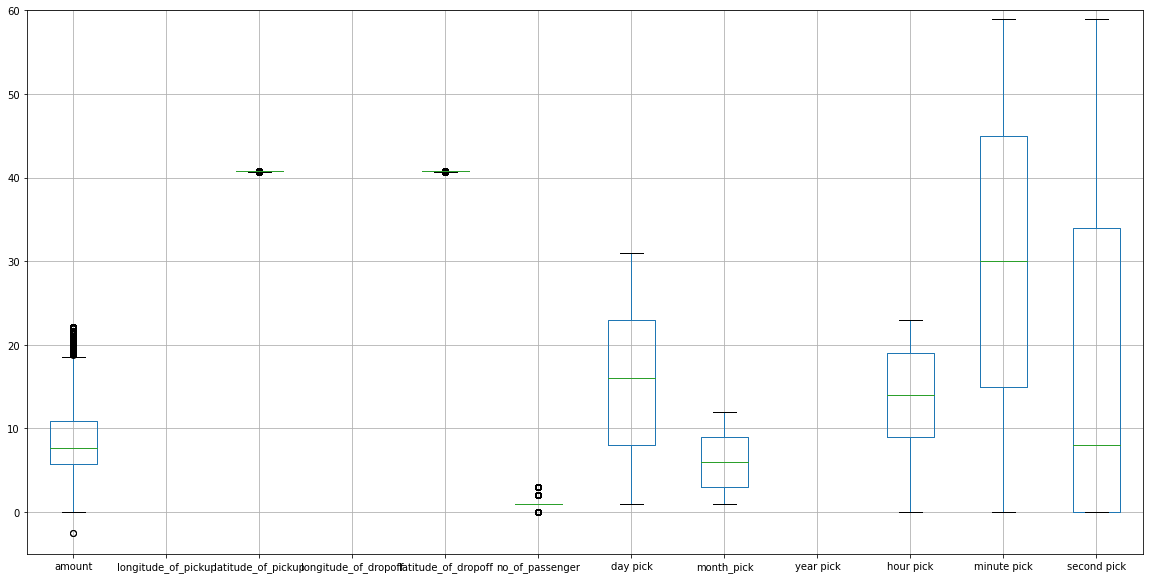

In [24]:
plt.figure(figsize=(20,10))
df_out.boxplot()
plt.ylim(-5,60)
plt.show()

In [25]:
#Treating outliers again
Q1=df_out.quantile(0.25)
Q3=df_out.quantile(0.75)
iqr=Q3-Q1
L=Q1-1.5*iqr
H=Q3+1.5*iqr
df_final=df_out[~((df_out < L) | (df_out>H)).any(axis=1)]
df_final


,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day pick,month_pick,year pick,hour pick,minute pick,second pick
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,52,16
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,30,42
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,51,0
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,6,1,2011,9,50,45
6,7.5,-73.980002,40.751662,-73.973802,40.764842,1,20,11,2012,20,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49993,7.3,-73.982363,40.765060,-73.969167,40.761268,1,7,4,2011,14,27,0
49994,8.5,-73.976212,40.744832,-73.981567,40.724635,1,13,10,2012,19,57,0
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,12,6,2013,23,25,15
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,22,6,2015,17,19,18


In [26]:
df.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
day pick                  int64
month_pick                int64
year pick                 int64
hour pick                 int64
minute pick               int64
second pick               int64
dtype: object

In [27]:
df_backup=df_final.copy(deep=True)

# FEATURE ENGINEERING

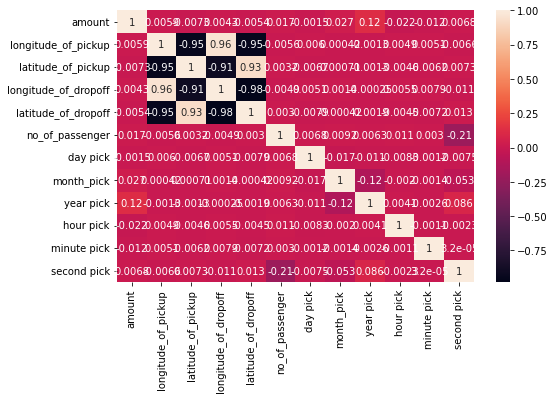

In [28]:
# Bivariate analysis before treating outliers data =df
#checking correlation of columns
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

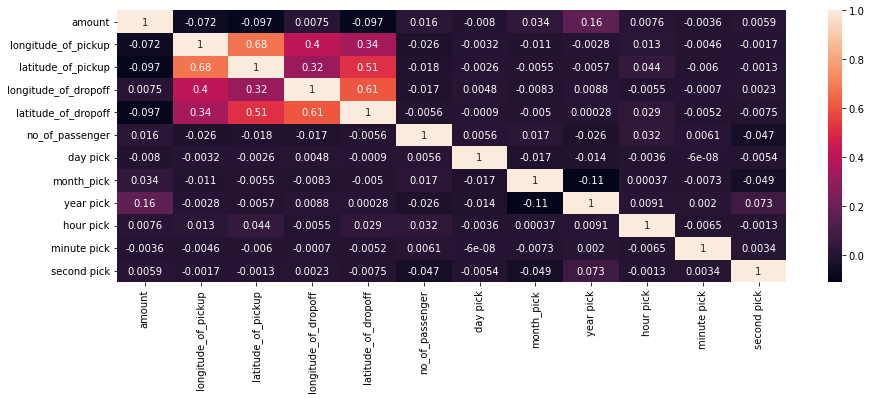

In [29]:
# Bivariate analysis after treating outliers data =df_final
#checking correlation of columns
plt.figure(figsize=(15,5))
sns.heatmap(df_out.corr(),annot=True)
plt.show()

In [30]:
#Regression model
from sklearn.linear_model import LinearRegression,SGDRegressor,LogisticRegression


In [31]:
# classification model
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

from xgboost import XGBClassifier,DMatrix



In [32]:
# results and split
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score,mean_squared_error


In [33]:
rfc=RandomForestClassifier(random_state=50,n_jobs=-1,max_depth=5,n_estimators=100,oob_score=True)
rfr=RandomForestRegressor(n_estimators=100,random_state=100,oob_score=True)

In [34]:
df_out

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day pick,month_pick,year pick,hour pick,minute pick,second pick
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,52,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0,35,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,30,42
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,51,0
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,6,1,2011,9,50,45
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,12,6,2013,23,25,15
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,22,6,2015,17,19,18
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,30,1,2011,4,53,0
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2,6,11,2012,7,9,0


In [110]:
from sklearn.preprocessing import MinMaxScaler
# Standardizing the data
sc=MinMaxScaler()
y=df_out['amount']
x=df_out.drop('amount',axis =1)

x_train,x_test,y_train,y_test=split(x,y,test_size=0.25,random_state=100)
# scaling the data
x_train_sc =sc.fit_transform(x_train)


x_test_sc=sc.transform(x_test)



C:\Users\Dhananjay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


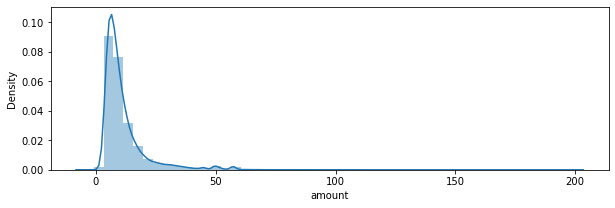

In [36]:
# checking the distribution of target variable and skewness and kurtosis

fig=plt.figure(figsize=(10,3))
sns.distplot(df['amount'],kde=True)
plt.show()

# Model 1 : LinearRegression

In [99]:
lr =LinearRegression()

# fitting the data in the model

lr.fit(x_train_sc,y_train)

# Predicting the model

train_pred=lr.predict(x_train_sc)
test_pred=lr.predict(x_test_sc)

LRMSE=np.sqrt(mean_squared_error(y_test,test_pred))
Lr2score=r2_score(y_test,test_pred)
# results
print('RMse of trained data is:',np.sqrt(mean_squared_error(y_train,train_pred)))
print('R2_score of trained data is:',r2_score(y_train,train_pred))

print('\nRMse of tested data is:',LRMSE)
print('R2_score of tested data is:',Lr2score)


RMse of trained data is: 3.83283836500952
R2_score of trained data is: 0.04801377989738975

RMse of tested data is: 3.8390078923204674
R2_score of tested data is: 0.0529723719500097


In [311]:
# CRoss Validation Scotre
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x_train,y_train,cv=20,scoring='r2')

array([0.02600546, 0.03994271, 0.02468785, 0.06411055, 0.05066298,
       0.04813983, 0.0392888 , 0.04436491, 0.05346282, 0.04604517,
       0.02212437, 0.06582874, 0.04463583, 0.05201692, 0.05709205,
       0.04665872, 0.06026809, 0.03421589, 0.05185005, 0.04448704])

# Linear Regression OLS with RFE

In [40]:

from sklearn.feature_selection import RFE
rfe=RFE(estimator=lr,n_features_to_select=5,step=4,verbose =True)


Fitting estimator with 11 features.
Fitting estimator with 7 features.
RMse of trained data is: 3.838965486408026
R2_score of trained data is: 0.04496768360617909

RMse of tested data is: 3.846494182783489
R2_score of tested data is: 0.04927525186702386
Fitting estimator with 11 features.
Fitting estimator with 7 features.
Fitting estimator with 11 features.
Fitting estimator with 7 features.
Fitting estimator with 11 features.
Fitting estimator with 7 features.
Fitting estimator with 11 features.
Fitting estimator with 7 features.
Fitting estimator with 11 features.
Fitting estimator with 7 features.
Fitting estimator with 11 features.
Fitting estimator with 7 features.
Fitting estimator with 11 features.
Fitting estimator with 7 features.
Fitting estimator with 11 features.
Fitting estimator with 7 features.
Fitting estimator with 11 features.
Fitting estimator with 7 features.
Fitting estimator with 11 features.
Fitting estimator with 7 features.
Fitting estimator with 11 features.


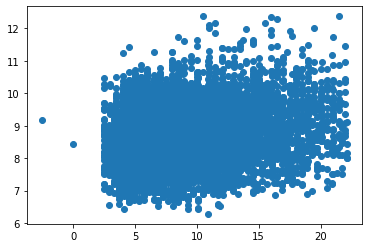

In [116]:
# fitting the data in the model

rfe.fit(x_train_sc,y_train)

# Predicting the model

train_pred=rfe.predict(x_train_sc)
test_pred=rfe.predict(x_test_sc)

LORMSE=np.sqrt(mean_squared_error(y_test,test_pred))
LOr2score=r2_score(y_test,test_pred)

# results
print('RMse of trained data is:',np.sqrt(mean_squared_error(y_train,train_pred)))
print('R2_score of trained data is:',r2_score(y_train,train_pred))

print('\nRMse of tested data is:',LORMSE)
print('R2_score of tested data is:',LOr2score)


# CRoss Validation Scotre
from sklearn.model_selection import cross_val_score
print('\nCV score:',cross_val_score(rfe,x_train,y_train,cv=20,scoring='r2'))
      
plt.scatter(y_test,test_pred)
plt.show()

# DECISION TREE REGRESSOR BASE MODEL

RMse of trained data is: 1.0026705363035789e-16
R2_score of trained data is: 1.0

RMse of tested data is: 3.093407923166439
R2_score of tested data is: 0.3851077401497479


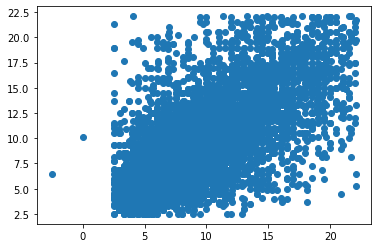

In [101]:
DCTr=DecisionTreeRegressor()

DCTr.fit(x_train_sc,y_train)

# Predicting the model

train_pred=DCTr.predict(x_train_sc)
test_pred=DCTr.predict(x_test_sc)


DCTRMSE=np.sqrt(mean_squared_error(y_test,test_pred))
DCTr2score=r2_score(y_test,test_pred)

# Regression results
print('RMse of trained data is:',np.sqrt(mean_squared_error(y_train,train_pred)))
print('R2_score of trained data is:',r2_score(y_train,train_pred))

print('\nRMse of tested data is:',DCTRMSE)
print('R2_score of tested data is:',DCTr2score)

plt.scatter(y_test,test_pred)

In [43]:
# CRoss Validation Scotre
from sklearn.model_selection import cross_val_score
print('\nCV score:',cross_val_score(DCTr,x_train,y_train,cv=10,scoring='r2'))


CV score: [0.35947226 0.39836312 0.39370368 0.43755073 0.40168036 0.39918484
 0.39599152 0.3112483  0.39098408 0.37279647]


# RAndom Forest Regressor Base Model

In [44]:
# classification model
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

from xgboost import XGBClassifier,DMatrix


RMse of trained data is: 0.7764442830236828
R2_score of trained data is: 0.9609329835592788

RMse of tested data is: 2.0302970937062472
R2_score of tested data is: 0.7351232585414287


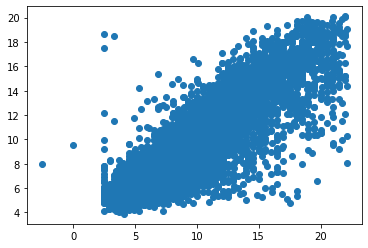

In [102]:
rfr=RandomForestRegressor(n_estimators=100,random_state=100,oob_score=True)

rfr.fit(x_train_sc,y_train)

# Predicting the model

train_pred=rfr.predict(x_train_sc)
test_pred=rfr.predict(x_test_sc)


RAFRMSE=np.sqrt(mean_squared_error(y_test,test_pred))
RAFr2score=r2_score(y_test,test_pred)
# Regression results
print('RMse of trained data is:',np.sqrt(mean_squared_error(y_train,train_pred)))
print('R2_score of trained data is:',r2_score(y_train,train_pred))

print('\nRMse of tested data is:',RAFRMSE)
print('R2_score of tested data is:',RAFr2score)

plt.scatter(y_test,test_pred)

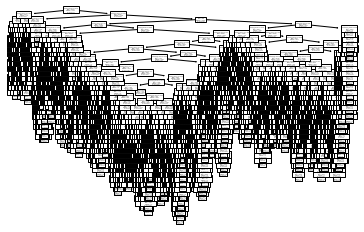

In [106]:
# plot tree

from sklearn.tree import plot_tree
plot_tree(rfr.estimators_[5],feature_names=x.columns)
plt.show()

In [95]:
# MODEL COMPARISION
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'RMSE', 'R2_score'])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy','Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                    'RMSE': np.sqrt(mean_squared_error(y_test,test_pred)),'R2_score':r2_score(y_test,test_pred)},ignore_index=True)

In [84]:
update_score_card('lr','RMSE','R2_score')
score_card

,Model,RMSE,R2_score
0,lr,3.132437,0.369494


In [96]:
update_score_card('DTCr')
score_card

,Model,RMSE,R2_score
0,rfe,3.132437,0.369494


In [98]:
update_score_card('DCTr')
score_card

,Model,RMSE,R2_score
0,DCTr,3.132437,0.369494


In [ ]:
update_score_card('rfr')

In [97]:
score_card.drop([0],axis=0,inplace =True)
score_card

,Model,RMSE,R2_score


# RANdom Forest Grid Search MODEL BUIlding

In [113]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

In [119]:
rfc=RandomForestClassifier(random_state=50,n_jobs=-1,max_depth=5,n_estimators=100,oob_score=True)
rfrg=RandomForestRegressor(random_state=100,n_jobs=-1,oob_score=True)

In [123]:
params={'max_depth':[5,20,30],'min_samples_leaf':[10,15,50],'n_estimators':[10,20,40]}

gd_search=GridSearchCV(estimator=rfrg ,param_grid=params, cv=4,n_jobs=1,scoring='accuracy')


In [124]:
gd_search.fit(x_train_sc,y_train)

C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y

C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y

C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y

C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y

C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y

C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y

C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y

C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y

C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y

C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y

C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y

C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y

C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y

C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y

C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y

C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y

C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y

C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y

C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


GridSearchCV(cv=4,
             estimator=RandomForestRegressor(n_jobs=-1, oob_score=True,
                                             random_state=100),
             n_jobs=1,
             param_grid={'max_depth': [5, 20, 30],
                         'min_samples_leaf': [10, 15, 50],
                         'n_estimators': [10, 20, 40]},
             scoring='accuracy')

In [125]:
gd_best=gd_search.best_estimator_
gd_best

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=10,
                      n_jobs=-1, oob_score=True, random_state=100)

C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RMse of trained data is: 3.3723886387918047
R2_score of trained data is: 0.2630044132954876

RMse of tested data is: 3.3777437854205576
R2_score of tested data is: 0.2668749714450772


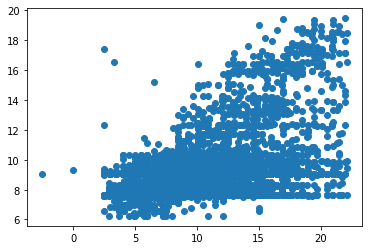

In [126]:
gd_best.fit(x_train_sc,y_train)

# Predicting the model

train_pred=gd_best.predict(x_train_sc)
test_pred=gd_best.predict(x_test_sc)


GDRMSE=np.sqrt(mean_squared_error(y_test,test_pred))
GDr2score=r2_score(y_test,test_pred)

# Regression results
print('RMse of trained data is:',np.sqrt(mean_squared_error(y_train,train_pred)))
print('R2_score of trained data is:',r2_score(y_train,train_pred))

print('\nRMse of tested data is:',GDRMSE)
print('R2_score of tested data is:',GDr2score)

plt.scatter(y_test,test_pred)

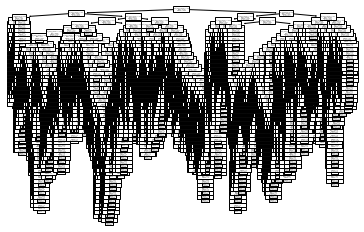

In [39]:
plot_tree(rfr.estimators_[5],feature_names=df_amount.drop(['amount','log_amount'],axis =1).columns)
plt.show()